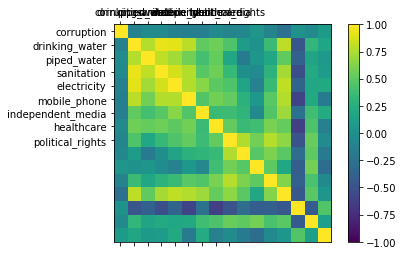

In [7]:
#Based in part on the tutorial found at: https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/
# Correction Matrix Plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
import numpy
from pandas.plotting import scatter_matrix
data = pandas.read_csv('SPI_all_features_stdscaler-with_headings.csv')
names = data.columns
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

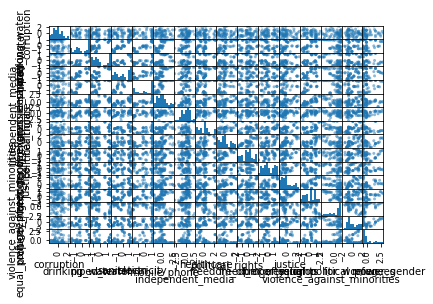

In [8]:
# Scatterplot Matrix
scatter_matrix(data)
plt.show()

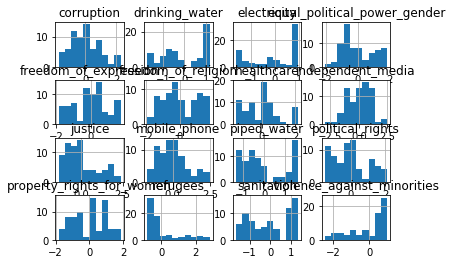

In [9]:
# Univariate Histograms
data.hist()
plt.show()

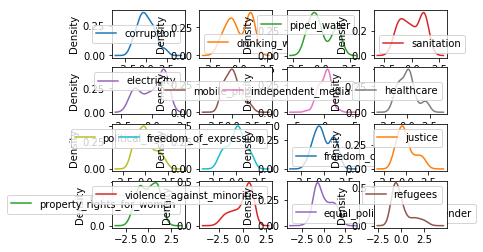

In [10]:
# Univariate Density Plots
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
plt.show()

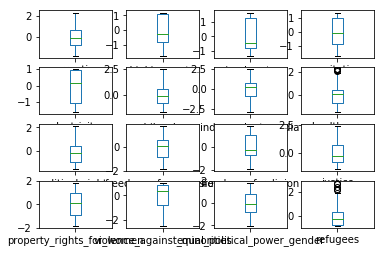

In [11]:
# Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

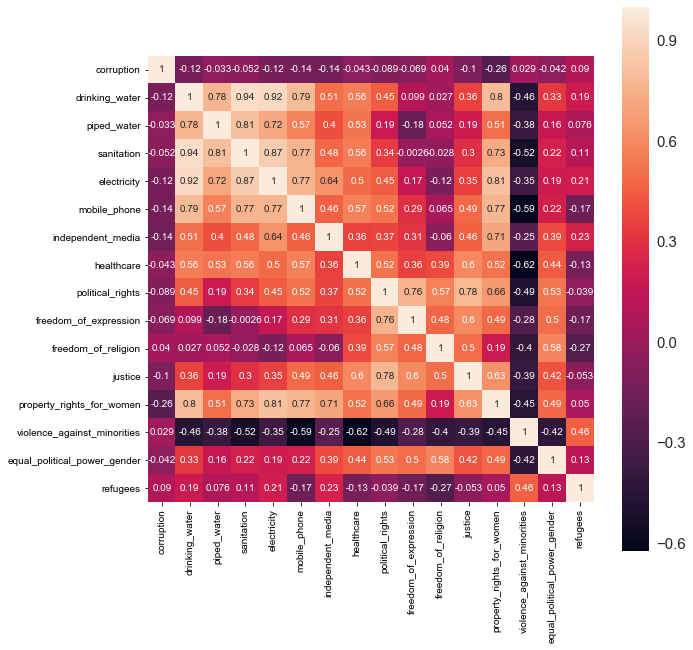

In [12]:
#Based in part on the tutorial found at: https://medium.com/analytics-vidhya/linear-regression-in-python-from-scratch-24db98184276
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [13]:
# Gradient Descent
def predictPrice(x,theta):
    return numpy.dot(x,theta)

def calculateCost(x,theta,Y):
    prediction = predictPrice(x,theta)
    return ((prediction - Y)**2).mean()/2

def abline(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = predictPrice(x,theta)
    plt.xlim(-0.6, 1.2)
    plt.ylim(-0.6, 3.0)
    plt.xlabel('Violence Against Minorities')
    plt.ylabel('Refugees')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x,Y,'.',x, y_vals, '-')
    plt.show()

def gradientDescentLinearRegression(alpha=0.047,iter=5000):
    theta0 = []
    theta1 = []
    costs = []
    predictor = data["violence_against_minorities"]
    x = numpy.column_stack((numpy.ones(len(predictor)),predictor))
    Y = data["refugees"]
    theta = numpy.zeros(2)
    for i in range(iter):
        pred = predictPrice(x,theta)
        t0 = theta[0] - alpha *(pred - Y).mean()
        t1 = theta[1] - alpha *((pred - Y)* x[:,1]).mean()
        
        theta = numpy.array([t0,t1])
        J = calculateCost(x,theta,Y)
        theta0.append(t0)
        theta1.append(t1)
        costs.append(J)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            abline(x,theta,Y)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs)}')
    
    # Plot cost curve
    fig, ax = plt.subplots(figsize=(12,8))
    print(numpy.arange(iter))
    ax.plot(numpy.arange(iter), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs. Training Epoch')

Iteration: 1,Cost = 0.48365583403070667,theta = [-1.98591463e-12  2.11555997e-02]


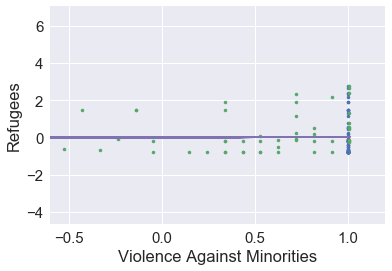

Iteration: 1001,Cost = 0.3902069303617661,theta = [-7.44048994e-11  4.56549417e-01]


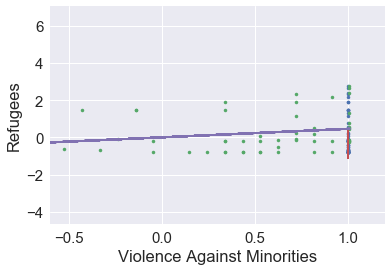

Iteration: 2001,Cost = 0.3902069303617661,theta = [-7.44049000e-11  4.56549417e-01]


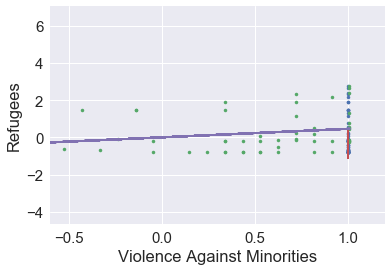

Iteration: 3001,Cost = 0.3902069303617661,theta = [-7.44048994e-11  4.56549417e-01]


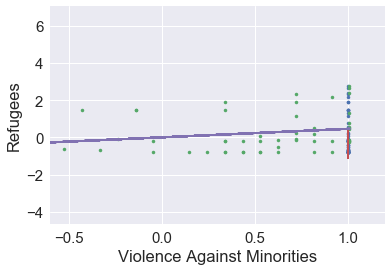

Iteration: 4001,Cost = 0.3902069303617661,theta = [-7.44049000e-11  4.56549417e-01]


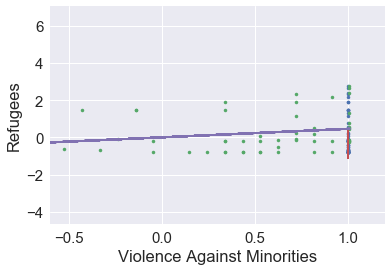

theta0 = 5000
theta1 = 5000
Costs = 5000
[   0    1    2 ... 4997 4998 4999]


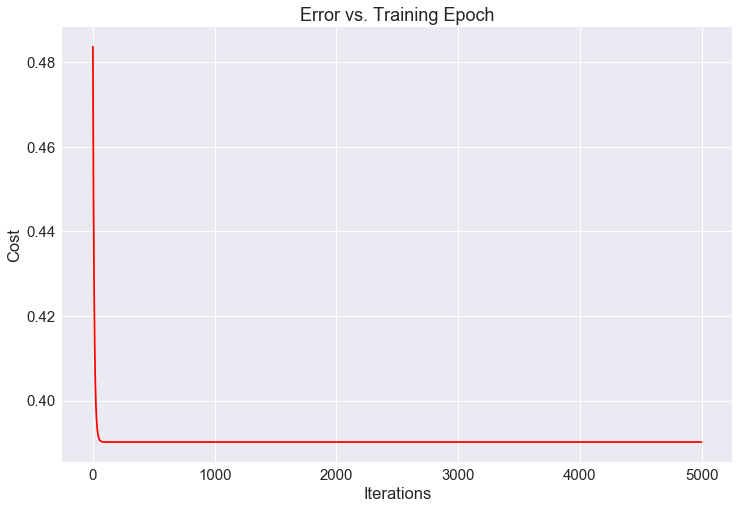

In [14]:
# Call the GradientDescentLinearRegression function
gradientDescentLinearRegression()